This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd

# Read data
titanic_data = pd.read_csv("datasets/titanic/train.csv")


In [2]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survival --> Survival	     0 = No, 1 = Yes
pclass   --> Ticket class    1 = 1st, 2 = 2nd, 3 = 3rd
sex      --> Sex
Age	     --> Age in years
sibsp	 --> # of siblings / spouses aboard the Titanic
parch	 --> # of parents / children aboard the Titanic
ticket	 --> Ticket number
fare	 --> Passenger fare
cabin	 --> Cabin number
embarked --> Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes
pclass: A proxy for socio-economic status (SES)
                    1st = Upper
                    2nd = Middle
                    3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
            sibsp: The dataset defines family relations in this way...
            Sibling = brother, sister, stepbrother, stepsister
            Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let's analyze each column

PassengerId: is the first column but it doesnt seem to be important in this problem.

Survived:

In [5]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

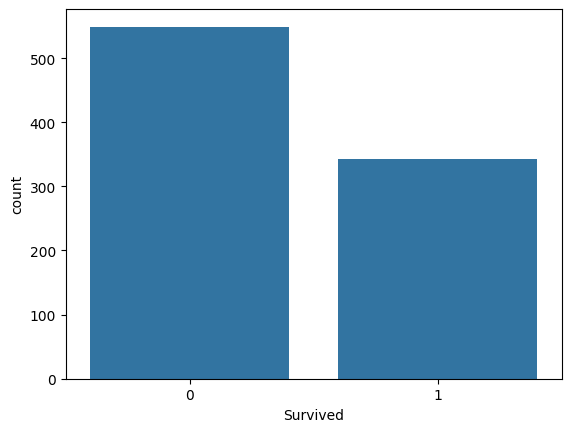

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Survived", data=titanic_data)
plt.show()

549 sinked and 342 survived. There is no missing values, or null values, etc. This column is correct and normalized.

Pclass:

In [7]:
titanic_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

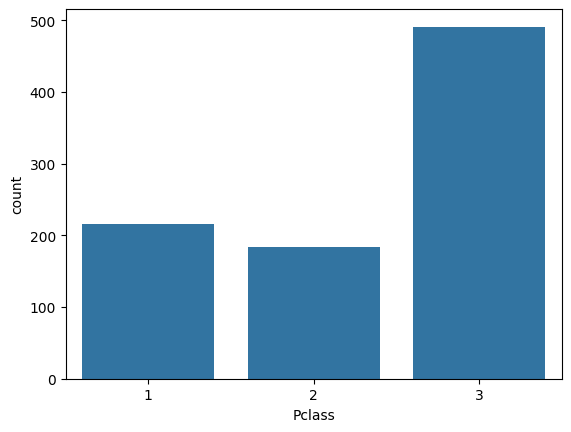

In [8]:
sns.countplot(x="Pclass", data=titanic_data)
plt.show()

There is no missing values, or null values, etc. This column is correct and normalized.

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we see, the age, the cabin and the Embarked are collumns with missing values. But before everything else, we need to split test data and train data

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(titanic_data, test_size=0.15, random_state=42)

In [11]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


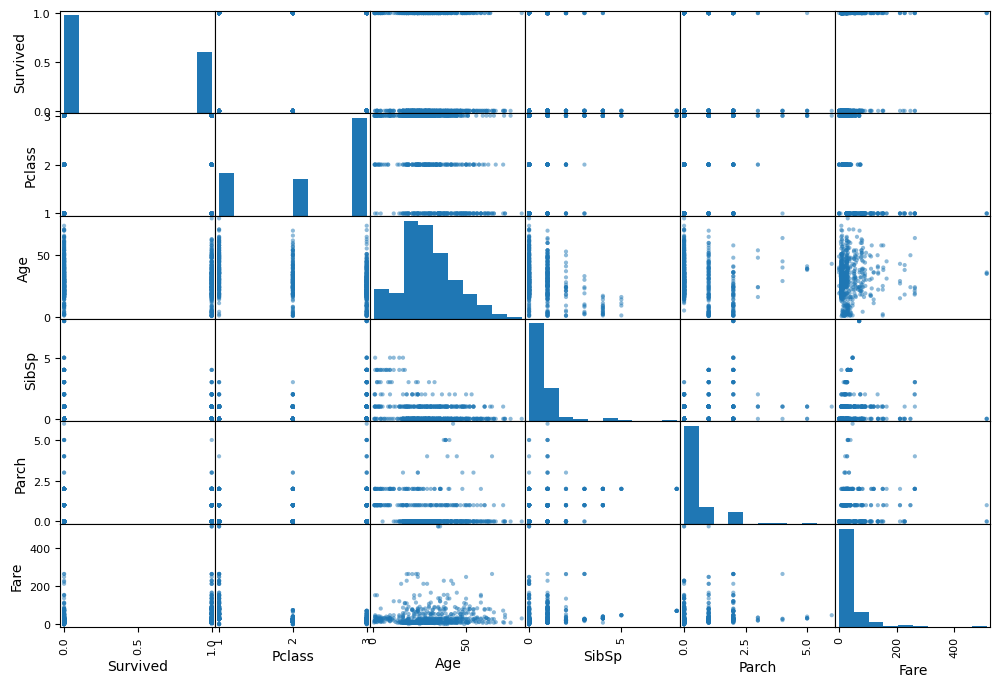

In [12]:
from pandas.plotting import scatter_matrix
attributes = ["Survived", "Pclass", "Age",
"SibSp", "Parch", "Fare"]
scatter_matrix(titanic_data[attributes], figsize=(12, 8))
plt.show()

There is not too much correlation between attributes. Name columns and ticket columns may not be so interesting

In [15]:
titanic_data = titanic_data.drop("Name", axis=1)

In [16]:
titanic_data = titanic_data.drop("Ticket", axis=1)

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


Survived column must be one hot encoded. 
Sex column must be one hot encoded.
Pclass column must be one hot encoded.
Age column must be bucketized (5 years steps) --> columns has missing values, must be fullfilled with some strategy

 

In [18]:
titanic_data = titanic_data.drop("Cabin", axis=1)

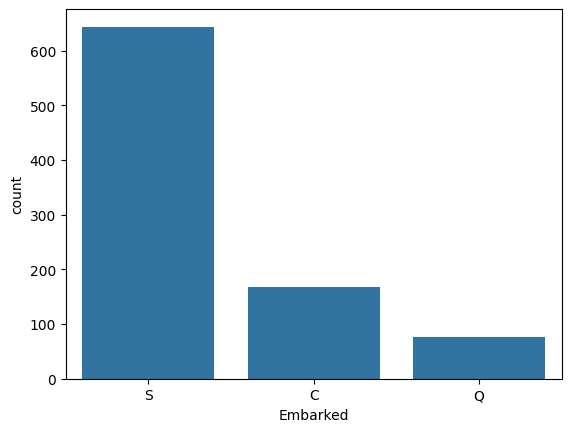

In [19]:
sns.countplot(x="Embarked", data=titanic_data)
plt.show()

Embarked seems to be not so usefull.

In [20]:
titanic_data = titanic_data.drop("Embarked", axis=1)

In [21]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [22]:
median = titanic_data["Age"].median() # option 3 --> less destructive
titanic_data["Age"].fillna(median, inplace=True)

C:\Users\U2301020\AppData\Local\Temp\ipykernel_30388\1706967354.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data["Age"].fillna(median, inplace=True)


In [23]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [25]:
import numpy as np
titanic_num = titanic_data.select_dtypes(include=[np.number])
titanic_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [26]:
imputer.fit(titanic_num)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([446.    ,   0.    ,   3.    ,  28.    ,   0.    ,   0.    ,
        14.4542])

In [28]:
titanic_cat = titanic_data[['Sex']]
titanic_cat.head(8)

,Sex
0,male
1,female
2,female
3,female
4,male
5,male
6,male
7,male


In [29]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
titanic_cat_encoded = ordinal_encoder.fit_transform(titanic_cat)
titanic_cat_encoded[:8]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [30]:
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object)]